In [ ]:
"""This script explores DeMar DeRozan's 3pt shots before and after a conversation with Raptors'
leadership in December, in which they discussed taking more threes"""

In [2]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# DeMar DeRozan's shot data from the 2017-18 regular season
shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?' + \
    'Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&' + \
    'PlayerPosition=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&' + \
    'StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season' + \
    '=2017-18&AheadBehind=&PlayerID=201942&EndRange=&VsDivision=&PointDiff' + \
    '=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=' + \
    '&SeasonType=Regular+Season&SeasonSegment=&GameID='

In [4]:
# Get the webpage containing the data
# need to use headers per https://stackoverflow.com/questions/46781563/how-to-obtain-a-json-response-from-the-stats-nba-com-api
request_headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'}
response = requests.get(shot_chart_url, headers = request_headers)
#grab the headers to be used as the column headers for the DataFrame
headers = response.json()['resultSets'][0]['headers']
#grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

In [5]:
shot_df = pd.DataFrame(shots, columns = headers)

# Display DataFrame
from IPython.display import display
with pd.option_context ('display.max_columns', None):
    display(shot_df.head(3))

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700014,9,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,11,22,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-70,6,1,0,20171019,TOR,CHI
1,Shot Chart Detail,0021700014,23,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,9,29,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,8,10,1,0,20171019,TOR,CHI
2,Shot Chart Detail,0021700014,94,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,2,17,Missed Shot,Turnaround Fadeaway Bank Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,11,111,37,1,0,20171019,TOR,CHI


In [6]:
# Create a DataFrame of 3pt shots only only
three_df = shot_df[shot_df.SHOT_TYPE == "3PT Field Goal"]

In [7]:
#select data for all shots prior to mid-December (12/15/2017)
shot_before_df = shot_df[shot_df.GAME_DATE < '20171215']
with pd.option_context('display.max_columns', None):
    display(shot_before_df.head(5))

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700014,9,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,11,22,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-70,6,1,0,20171019,TOR,CHI
1,Shot Chart Detail,0021700014,23,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,9,29,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,8,10,1,0,20171019,TOR,CHI
2,Shot Chart Detail,0021700014,94,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,2,17,Missed Shot,Turnaround Fadeaway Bank Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,11,111,37,1,0,20171019,TOR,CHI
3,Shot Chart Detail,0021700014,317,201942,DeMar DeRozan,1610612761,Toronto Raptors,3,11,47,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,12,50,113,1,0,20171019,TOR,CHI
4,Shot Chart Detail,0021700014,323,201942,DeMar DeRozan,1610612761,Toronto Raptors,3,11,8,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,11,27,1,0,20171019,TOR,CHI


In [8]:
#select data for all shots after mid-December (12/15/2017)
shot_after_df = shot_df[shot_df.GAME_DATE > '20171215']
with pd.option_context('display.max_columns', None):
    display(shot_after_df.head(5))

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
471,Shot Chart Detail,0021700437,36,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,8,27,Missed Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-29,8,1,0,20171217,TOR,SAC
472,Shot Chart Detail,0021700437,67,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,6,16,Made Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,20,81,189,1,1,20171217,TOR,SAC
473,Shot Chart Detail,0021700437,106,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,3,4,Made Shot,Turnaround Jump Shot,2PT Field Goal,In The Paint (Non-RA),Left Side(L),8-16 ft.,11,-73,85,1,1,20171217,TOR,SAC
474,Shot Chart Detail,0021700437,125,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,1,30,Made Shot,Driving Floating Bank Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,30,6,1,1,20171217,TOR,SAC
475,Shot Chart Detail,0021700437,132,201942,DeMar DeRozan,1610612761,Toronto Raptors,1,0,33,Missed Shot,Driving Floating Bank Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,41,36,1,0,20171217,TOR,SAC


In [9]:
#select shots made before and after 12/15/2017
shot_m_before_df = shot_before_df[shot_before_df.SHOT_MADE_FLAG == 1]
shot_m_after_df = shot_after_df[shot_after_df.SHOT_MADE_FLAG == 1]

In [10]:
#draw the court to be used for shot charts
from matplotlib.patches import Circle, Rectangle, Arc

#10 units = 1 foot

def draw_court(ax = None, color="black", lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
     
    # Create basketball hoop
    hoop = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Create backboard
    backboard = Rectangle((-30,-7.5), 60, -1, linewidth=lw, color=color)
    
    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

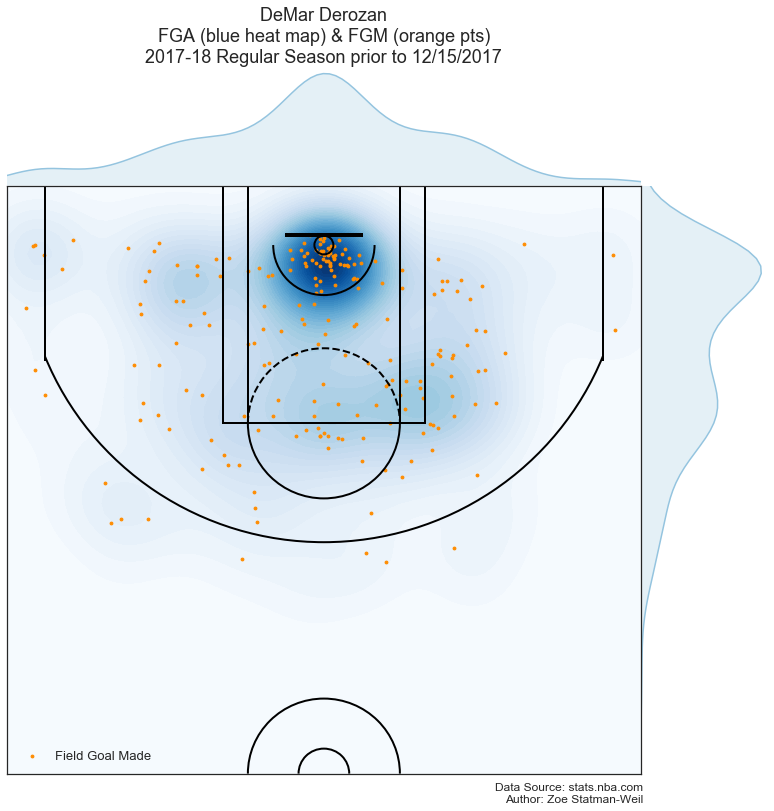

In [36]:
# Create a shot chart of all shots prior to 12/15/2017. A heat map will be used to display all shots taken, and pts will 
# show shots made

cmap=plt.cm.Blues

# Note: n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_before_df.LOC_X, shot_before_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.4),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Add FGM
FGM = ax.scatter(shot_m_before_df.LOC_X, shot_m_before_df.LOC_Y, c="darkorange", s=8)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add legend
ax.legend([FGM],["Field Goal Made"], fontsize=13)

# Add a title
ax.set_title('DeMar Derozan\n FGA (blue heat map) & FGM (orange pts) \n2017-18 Regular Season prior to 12/15/2017', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(135,445,'Data Source: stats.nba.com'
        '\nAuthor: Zoe Statman-Weil',
        fontsize=12, multialignment = "right")

plt.show()

Text(135,445,'Data Source: stats.nba.com\nAuthor: Zoe Statman-Weil')

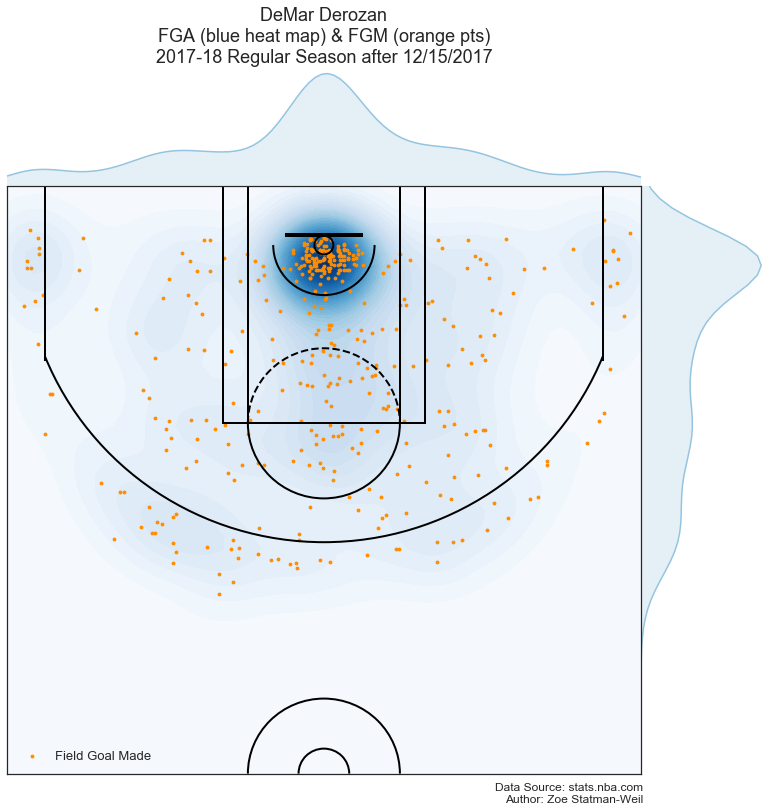

In [37]:
# Create a shot chart of all shots after 12/15/2017. A heat map will be used to display all shots taken, and pts will 
# show shots made

cmap=plt.cm.Blues

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_after_df.LOC_X, shot_after_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.4),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Add FGM
FGM = ax.scatter(shot_m_after_df.LOC_X, shot_m_after_df.LOC_Y, c="darkorange", s=8)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add legend
ax.legend([FGM],["Field Goal Made"], fontsize=13)

# Add a title
ax.set_title('DeMar Derozan\n FGA (blue heat map) & FGM (orange pts) \n2017-18 Regular Season after 12/15/2017', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(135,445,'Data Source: stats.nba.com'
        '\nAuthor: Zoe Statman-Weil',
        fontsize=12, multialignment = "right")


Text(0.5,1,'DeMar DeRozan\n 3pt Shot Chart \n2017-18 Regular Season')

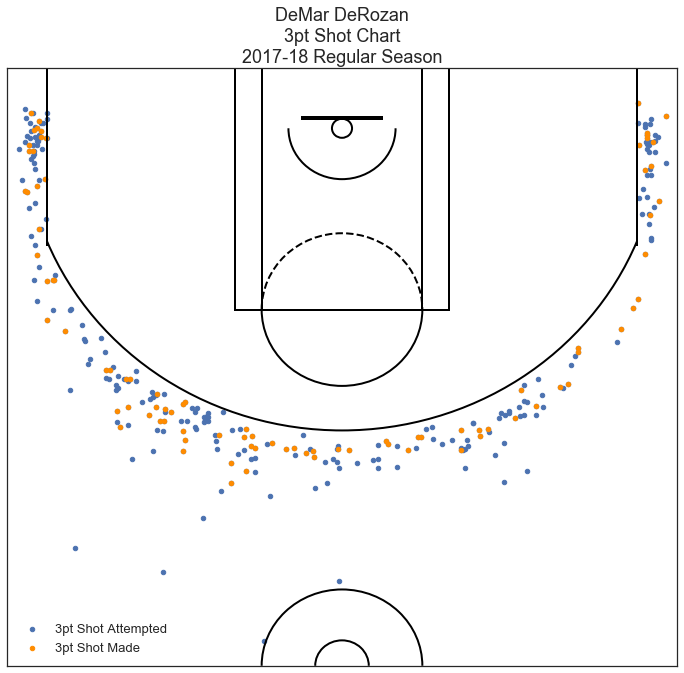

In [13]:
# Create a shot chart showing all 3pt shots attempted and made and save it as an image  

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))

# Add 3pt shots attempted and made
TA = plt.scatter(three_df.LOC_X, three_df.LOC_Y, c="b", s=20)
TM = plt.scatter(three_df[three_df.SHOT_MADE_FLAG==1].LOC_X, three_df[three_df.SHOT_MADE_FLAG==1].LOC_Y, c="darkorange", s=20)
draw_court()

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
plt.tick_params(labelbottom=False, labelleft=False)

# Add legend
plt.legend([TA, TM],["3pt Shot Attempted", "3pt Shot Made"], fontsize=13)

# Add a title
plt.title('DeMar DeRozan\n 3pt Shot Chart \n2017-18 Regular Season', fontsize=18)

#save the image
#plt.savefig("DD_3pt_ShotChart.png", dpi = 300)

In [78]:
#Create a summary table of 3pt shots made and 3pt shots attempted
threes_summary = pd.pivot_table(three_df, index = "GAME_DATE", values = ["SHOT_ATTEMPTED_FLAG", "SHOT_MADE_FLAG"],  aggfunc = np.sum)
threes_summary["GAME_DATE_INT"] = threes_summary.index.astype('int64')
threes_summary[["STR_DATE"]] = threes_summary[['GAME_DATE_INT']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))

#Create a summary table of FGM and FGA
shot_summary = pd.pivot_table(shot_df, index = "GAME_DATE", values = ["SHOT_ATTEMPTED_FLAG", "SHOT_MADE_FLAG"],  aggfunc = np.sum)
shot_summary["GAME_DATE_INT"] = shot_summary.index.astype('int64')
shot_summary[["STR_DATE"]] = shot_summary[['GAME_DATE_INT']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))
shot_summary["THREES_ATTEMPTED"] = threes_summary["SHOT_ATTEMPTED_FLAG"]
shot_summary["THREES_MADE"] = threes_summary["SHOT_MADE_FLAG"]
shot_summary = shot_summary.fillna(value=0)
##NOTE TO SELF: Add column of 3pt shots made and attempted because my summary of all threes taken below does not have a row 
#for games where no three was taken

display(shot_summary.head(27))
display(threes_summary.head(5))
len(shot_summary)

,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE_INT,STR_DATE,THREES_ATTEMPTED,THREES_MADE
GAME_DATE,,,,,,
20171019,9,2,20171019,10/19/2017,0.0,0.0
20171021,12,8,20171021,10/21/2017,1.0,0.0
20171023,20,10,20171023,10/23/2017,5.0,2.0
20171025,18,9,20171025,10/25/2017,0.0,0.0
20171027,21,9,20171027,10/27/2017,2.0,0.0
20171030,20,10,20171030,10/30/2017,0.0,0.0
20171101,10,4,20171101,11/01/2017,1.0,0.0
20171103,20,10,20171103,11/03/2017,7.0,3.0
20171105,21,8,20171105,11/05/2017,5.0,0.0


,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE_INT,STR_DATE
GAME_DATE,,,,
20171021,1,0,20171021,10/21/2017
20171023,5,2,20171023,10/23/2017
20171027,2,0,20171027,10/27/2017
20171101,1,0,20171101,11/01/2017
20171103,7,3,20171103,11/03/2017


80

<function matplotlib.pyplot.show>

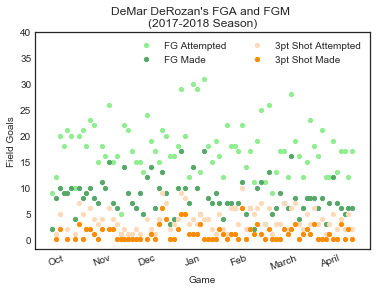

In [15]:
import calendar

# Create a graph showing FGA, FGM, 3pt A, 3pt M
FGA = plt.scatter(shot_summary.STR_DATE, shot_summary.SHOT_ATTEMPTED_FLAG, color = "lightgreen", s = 18)
FGM = plt.scatter(shot_summary.STR_DATE, shot_summary.SHOT_MADE_FLAG, color = "g", s = 18)
TA = plt.scatter(threes_summary.STR_DATE, threes_summary.SHOT_ATTEMPTED_FLAG, color = "peachpuff", s = 18)
TM = plt.scatter(threes_summary.STR_DATE, threes_summary.SHOT_MADE_FLAG, color = "darkorange", s = 18)

# Adjust tick marks
plt.xticks(np.arange(1, 82, step=12), ("Oct", "Nov", "Dec", "Jan", "Feb", "March", "April"), rotation = 20)
plt.yticks(np.arange(0, 45, step=5))

# Label the axes
plt.xlabel("Game")
plt.ylabel("Field Goals")

# Add a title and legend
plt.title("DeMar DeRozan's FGA and FGM \n(2017-2018 Season)")
plt.legend((FGA, FGM, TA, TM),
           ('FG Attempted', 'FG Made','3pt Shot Attempted', '3pt Shot Made'),
           scatterpoints=1, 
           loc='upper right', 
           ncol=2, 
           fontsize=10)
plt.show

<function matplotlib.pyplot.show>

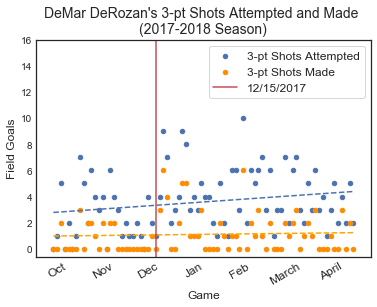

In [71]:
import calendar
from matplotlib.offsetbox import  OffsetImage
from scipy import stats

# Create a graph showing 3pt shots attempted, 3p shots made
fig, ax = plt.subplots()
TA = plt.scatter(shot_summary.STR_DATE, shot_summary.THREES_ATTEMPTED, color="b", s=20)
TM = plt.scatter(shot_summary.STR_DATE, shot_summary.THREES_MADE, color="darkorange", s=20)

# Label the axes
plt.xlabel("Game", fontsize=12)
plt.ylabel("Field Goals", fontsize=12)

# Add a trendline for 3pt Shots Attempted
z = np.polyfit(range(0,80), shot_summary.THREES_ATTEMPTED, 1)
p = np.poly1d(z)
plt.plot(range(0,80),p(range(0,80)),"b--")

# Add a trendline for 3pt Shots Made
z = np.polyfit(range(0,80), shot_summary.THREES_MADE, 1)
p = np.poly1d(z)
plt.plot(range(0,80),p(range(0,80)), color='orange', linestyle='--')

#add red line on 12/15/2017
meeting_date = plt.axvline(x=27, color = 'r')

# Adjust tick marks
plt.xticks(np.arange(1, 80, step=12), ("Oct", "Nov", "Dec", "Jan", "Feb", "March", "April"), rotation=30, fontsize=12)
plt.yticks(np.arange(0, 18, step=2))

# Add a title and legend
plt.title("DeMar DeRozan's 3-pt Shots Attempted and Made \n(2017-2018 Season)", fontsize=14)
plt.legend((TA, TM, meeting_date),
           ('3-pt Shots Attempted', '3-pt Shots Made', "12/15/2017"),
           scatterpoints=1, 
           loc='upper right', 
           ncol=1, 
           fontsize=12,
           frameon=True)

# Add shot chart
# shot_chart_img = plt.imread("DD_3pt_ShotChart.png")
# img = OffsetImage(shot_chart_img, zoom=0.1)
# img.set_offset((500, 50))
# ax.add_artist(img)

plt.show

<function matplotlib.pyplot.show>

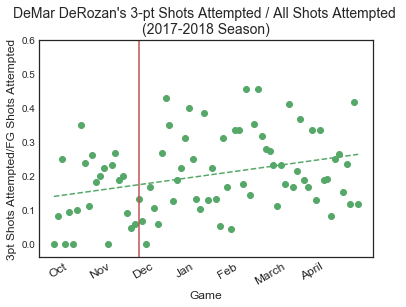

In [83]:
# Create a graph showing 3pt shots attempted, 3p shots made
fig, ax = plt.subplots()
Ratio = plt.scatter(shot_summary.STR_DATE, shot_summary.THREES_ATTEMPTED / shot_summary.SHOT_ATTEMPTED_FLAG, color="g")

# Label the axes
plt.xlabel("Game", fontsize=12)
plt.ylabel("3pt Shots Attempted/FG Shots Attempted", fontsize=12)

# Add a trendline 
z = np.polyfit(range(0,80), shot_summary.THREES_ATTEMPTED / shot_summary.SHOT_ATTEMPTED_FLAG, 1)
p = np.poly1d(z)
plt.plot(range(0,80),p(range(0,80)),"g--")

#add red line on 12/15/2017
meeting_date = plt.axvline(x=22, color = 'r')

# Adjust tick marks
plt.xticks(np.arange(1, 80, step=11), ("Oct", "Nov", "Dec", "Jan", "Feb", "March", "April"), rotation=30, fontsize=12)
plt.yticks(np.arange(0, 0.7, step=0.1))

# Add a title and legend
plt.title("DeMar DeRozan's 3-pt Shots Attempted / All Shots Attempted \n(2017-2018 Season)", fontsize=14)

plt.show

In [66]:
# Determine average threes taken per game before and after 12/15/2017
threes_attempted_pre = shot_summary[shot_summary.GAME_DATE_INT <= 20171215]["THREES_ATTEMPTED"].mean()
threes_attempted_after = shot_summary[shot_summary.GAME_DATE_INT > 20171215]["THREES_ATTEMPTED"].mean()


print threes_attempted_pre
print threes_attempted_after


2.48148148148
4.15094339623


In [65]:
# Determine average threes made per game before and after 12/15/2017
threes_made_pre = shot_summary[shot_summary.GAME_DATE_INT <= 20171215]["THREES_MADE"].mean()
threes_made_after = shot_summary[shot_summary.GAME_DATE_INT > 20171215]["THREES_MADE"].mean()

print threes_made_pre
print threes_made_after

0.62962962963
1.35849056604


In [67]:
# Determine total 3pt % before and after 12/15/2017
three_perc_pre = threes_made_pre / threes_attempted_pre
three_perc_after = threes_made_after / threes_attempted_after

print three_perc_pre
print three_perc_after

0.253731343284
0.327272727273


In [68]:
# Determine total games played before and after 12/15/2017
total_games_pre = shot_summary[shot_summary.GAME_DATE_INT <= 20171215]["SHOT_ATTEMPTED_FLAG"].count()
total_games_after = shot_summary[shot_summary.GAME_DATE_INT > 20171215]["SHOT_ATTEMPTED_FLAG"].count()

print total_games_pre
print total_games_after

27
53
